Credit Card Data Analysis Project

This script performs various data analysis tasks on credit card data including:
1. Monthly spend of each customer.
2. Monthly repayment of each customer.
3. Identification of the highest paying 10 customers.
4. Segment spending analysis.
5. Age group spending analysis.
6. Profitability analysis by segment.
7. Category spending analysis.
8. Imposing interest on due amounts.
9. Monthly profit calculation for the bank.

Data: 'Credit.xls' containing three sheets:
- Customer Acquisition
- Spend
- Repayment


In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'Credit.xls'

In [3]:
# Load data
customer_acquisition = pd.read_excel(file_name, sheet_name='Customer Acqusition')
spend = pd.read_excel(file_name, sheet_name='Spend')
repayment = pd.read_excel(file_name, sheet_name='Repayment')


In [4]:
# Display the DataFrame
print(customer_acquisition.head())
print(spend.head())
print(repayment.head())

   Sl No: Customer        Age       City Credit Card Product   Limit Company  \
0       1       A1   0.928521  BANGALORE                Gold  500000      C1   
1       2       A2  35.534551   CALCUTTA              Silver  100000      C2   
2       3       A3  11.559307     COCHIN            Platimum   10000      C3   
3       4       A4  45.820278     BOMBAY            Platimum   10001      C4   
4       5       A5  69.663948  BANGALORE            Platimum   10002      C5   

         Segment  
0  Self Employed  
1   Salaried_MNC  
2   Salaried_Pvt  
3           Govt  
4  Normal Salary  
   Sl No: Costomer      Month       Type         Amount
0       1       A1 2004-01-12  JEWELLERY  473775.834869
1       2       A1 2004-01-03      PETRO  335578.666019
2       3       A1 2004-01-15    CLOTHES  371040.941912
3       4       A1 2004-01-25       FOOD  141177.813256
4       5       A1 2005-01-17     CAMERA  398403.771812
   SL No: Costomer      Month         Amount
0       1       A1 2004-

In [6]:
# 1. Provide a meaningful treatment to all values where age is less than 18
# Assume 'age' column exists in customer_acquisition DataFrame
customer_acquisition['Age'] = customer_acquisition['Age'].apply(lambda x: np.nan if x < 18 else x)
customer_acquisition['Age'].fillna(customer_acquisition['Age'].median(), inplace=True)


In [7]:
# Verify the treatment
print(customer_acquisition[customer_acquisition['Age'] < 18])

Empty DataFrame
Columns: [Sl No:, Customer, Age, City, Credit Card Product, Limit, Company, Segment]
Index: []


In [14]:

# Correct column names if necessary
spend.rename(columns={'Costomer': 'Customer'}, inplace=True)
repayment.rename(columns={'Costomer': 'Customer'}, inplace=True)


In [15]:

# Print column names to verify
print("Customer Acquisition columns:", customer_acquisition.columns)
print("Spend columns:", spend.columns)
print("Repayment columns:", repayment.columns)


Customer Acquisition columns: Index(['Sl No:', 'Customer', 'Age', 'City', 'Credit Card Product', 'Limit',
       'Company', 'Segment'],
      dtype='object')
Spend columns: Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')
Repayment columns: Index(['SL No:', 'Customer', 'Month', 'Amount'], dtype='object')


In [16]:

# Check existence of required columns
required_columns_customer_acquisition = ['Customer', 'Limit', 'Age']
required_columns_spend = ['Customer', 'Month', 'Amount']
required_columns_repayment = ['Customer', 'Month', 'Amount']



In [17]:
missing_columns_customer_acquisition = [col for col in required_columns_customer_acquisition if col not in customer_acquisition.columns]
missing_columns_spend = [col for col in required_columns_spend if col not in spend.columns]
missing_columns_repayment = [col for col in required_columns_repayment if col not in repayment.columns]



In [22]:
if not missing_columns_customer_acquisition and not missing_columns_spend and not missing_columns_repayment:
    # 1. Provide a meaningful treatment to all values where age is less than 18
    if 'Age' in customer_acquisition.columns:
        customer_acquisition['Age'] = customer_acquisition['Age'].apply(lambda x: np.nan if x < 18 else x)
        customer_acquisition['Age'].fillna(customer_acquisition['Age'].median(), inplace=True)

    # 2. Check if there is any customer who has spent more than his/her Credit Limit for any particular month
    spend = spend.merge(customer_acquisition[['Customer', 'Limit']], on='Customer', how='left')

    monthly_spend = spend.groupby(['Customer', 'Month']).agg({'Amount': 'sum'}).reset_index()
    monthly_spend = monthly_spend.rename(columns={'Amount': 'Total Spend'})
    monthly_spend = monthly_spend.merge(customer_acquisition[['Customer', 'Limit']], on='Customer', how='left')
    overspend = monthly_spend[monthly_spend['Total Spend'] > monthly_spend['Limit']]

    print("Customers who have spent more than their Credit Limit in any particular month:")
    print(overspend)

    # 3. Monthly spend of each customer
    print("Monthly spend of each customer:")
    print(monthly_spend)

    # 4. Monthly repayment of each customer
    monthly_repayment = repayment.groupby(['Customer', 'Month']).agg({'Amount': 'sum'}).reset_index()
    monthly_repayment = monthly_repayment.rename(columns={'Amount': 'Total Repayment'})
    print("Monthly repayment of each customer:")
    print(monthly_repayment)

    # 5. Highest paying 10 customers
    total_spend_per_customer = spend.groupby('Customer').agg({'Amount': 'sum'}).reset_index()
    highest_paying_customers = total_spend_per_customer.sort_values(by='Amount', ascending=False).head(10)
    print("Highest paying 10 customers:")
    print(highest_paying_customers)

    # 6. People in which segment are spending more money
    spend_segment = spend.merge(customer_acquisition[['Customer', 'Segment']], on='Customer', how='left')
    segment_spending = spend_segment.groupby('Segment').agg({'Amount': 'sum'}).reset_index()
    print("Segment spending:")
    print(segment_spending)

    # 7. Which age group is spending more money
    spend_age = spend.merge(customer_acquisition[['Customer', 'Age']], on='Customer', how='left')
    spend_age['Age Group'] = pd.cut(spend_age['Age'], bins=[18, 30, 40, 50, 60, 70, 80, 90], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
    age_group_spending = spend_age.groupby('Age Group').agg({'Amount': 'sum'}).reset_index()
    print("Age group spending:")
    print(age_group_spending)

    # 8. Most profitable segment
    # First, calculate profit per customer per month
    spend_repayment = monthly_spend.merge(monthly_repayment, on=['Customer', 'Month'], how='left')
    spend_repayment['Due'] = spend_repayment['Total Spend'] - spend_repayment['Total Repayment']
    spend_repayment['Interest'] = spend_repayment['Due'] * 0.029
    spend_repayment['Profit'] = spend_repayment['Interest']
    
    spend_repayment_segment = spend_repayment.merge(customer_acquisition[['Customer', 'Segment']], on='Customer', how='left')
    segment_profit = spend_repayment_segment.groupby('Segment').agg({'Profit': 'sum'}).reset_index()
    print("Most profitable segment:")
    print(segment_profit)

    # 9. In which category the customers are spending more money
    category_spending = spend.groupby('Type').agg({'Amount': 'sum'}).reset_index()
    print("Category spending:")
    print(category_spending)

    # 10. Monthly profit for the bank
    monthly_profit = spend_repayment.groupby('Month').agg({'Profit': 'sum'}).reset_index()
    print("Monthly profit for the bank:")
    print(monthly_profit)

else:
    print("Some required columns are missing. Please check the data and column names.")

Customers who have spent more than their Credit Limit in any particular month:
     Customer      Month    Total Spend   Limit
1          A1 2004-01-12  526000.887677  500000
9          A1 2005-02-23  704755.260545  500000
15        A10 2004-01-15  609828.254814  500000
33        A11 2004-01-25  676996.216426  500000
34        A11 2004-02-05  501940.267611  500000
...       ...        ...            ...     ...
1246       A9 2006-07-03  476269.151151  100003
1253      A96 2004-01-25  320363.535698  100000
1254      A97 2004-01-12  164330.042270   10000
1255      A98 2004-01-03   87483.511992   10001
1256      A99 2004-01-15  476020.386647   10002

[595 rows x 4 columns]
Monthly spend of each customer:
     Customer      Month    Total Spend   Limit
0          A1 2004-01-03  335578.666019  500000
1          A1 2004-01-12  526000.887677  500000
2          A1 2004-01-15  371040.941912  500000
3          A1 2004-01-25  278552.250673  500000
4          A1 2004-02-05   41381.105869  500000
.

In [23]:
# Save results to Excel
with pd.ExcelWriter('Credit_Analysis_Output_Final.xlsx') as writer:
    monthly_spend.to_excel(writer, sheet_name='Monthly_Spend', index=False)
    monthly_repayment.to_excel(writer, sheet_name='Monthly_Repayment', index=False)
    highest_paying_customers.to_excel(writer, sheet_name='Highest_Paying_Customers', index=False)
    segment_spending.to_excel(writer, sheet_name='Segment_Spending', index=False)
    age_group_spending.to_excel(writer, sheet_name='Age_Group_Spending', index=False)
    segment_profit.to_excel(writer, sheet_name='Segment_Profit', index=False)
    category_spending.to_excel(writer, sheet_name='Category_Spending', index=False)
    monthly_profit.to_excel(writer, sheet_name='Monthly_Profit', index=False)

print("Analysis complete. Results saved to Credit_Analysis_Output_Final.xlsx.")

Analysis complete. Results saved to Credit_Analysis_Output_Final.xlsx.


Text(0, 0.5, 'Total Amount')

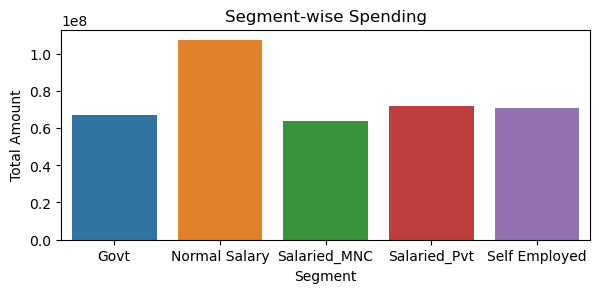

In [35]:
# Visualize some of the findings with charts
plt.figure(figsize=(15, 6))

# Task 4: Segment spending
plt.subplot(2, 2, 1)
sns.barplot(data=segment_spending, x='Segment', y='Amount')
plt.title('Segment-wise Spending')
plt.xlabel('Segment')
plt.ylabel('Total Amount')



Text(0, 0.5, 'Total Amount')

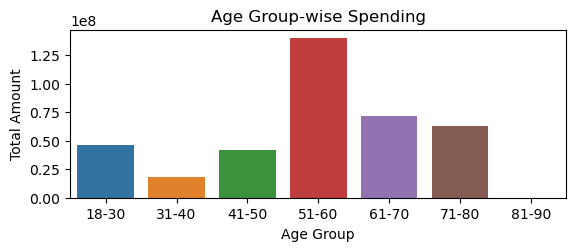

In [37]:
# Task 5: Age group spending
plt.subplot(2, 1, 1)
sns.barplot(data=age_group_spending, x='Age Group', y='Amount')
plt.title('Age Group-wise Spending')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'AIR TICKET'),
  Text(1, 0, 'AUTO'),
  Text(2, 0, 'BIKE'),
  Text(3, 0, 'BUS TICKET'),
  Text(4, 0, 'CAMERA'),
  Text(5, 0, 'CAR'),
  Text(6, 0, 'CLOTHES'),
  Text(7, 0, 'FOOD'),
  Text(8, 0, 'JEWELLERY'),
  Text(9, 0, 'MOVIE TICKET'),
  Text(10, 0, 'PETRO'),
  Text(11, 0, 'RENTAL'),
  Text(12, 0, 'SANDALS'),
  Text(13, 0, 'SHOPPING'),
  Text(14, 0, 'TRAIN TICKET')])

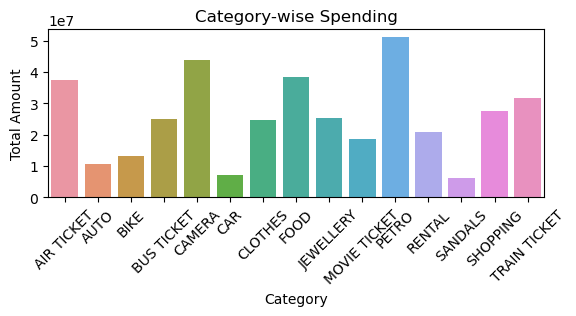

In [41]:
# Task 7: Category spending
plt.subplot(2, 1, 2)
sns.barplot(data=category_spending, x='Type', y='Amount')
plt.title('Category-wise Spending')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)

In [42]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>